In [1]:
import pandas as pd

In [2]:
%matplotlib inline 

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

# Overview

Each row represents a home sale.

We try to predict both home sales, and types of sales.

When `audantic_target`=1, this is the type of transaction we are trying to predict.

```
'audantic_target': 1 or 0, if we are trying to predict

'pid': property id
'did': sales document id
'fips': county id
'zipcode': zipcode
'sfr': bool for is single family home

-- house details
'square_footage': 
'year_built'
'equity'
'estimated_value'
'tax_assessed_value'
'length_of_ownership'

-- owner details
'est_household_income_val': estimated income
'mosaic_hh_val': demographic variable for home
'mosaic_zip4_val': demographic variable for neighborhood
'mosaic_diff': difference between home and neighborhood demographics

-- sale descriptors
'sale_amount': home sale price
'seller_name'
'buyer_name'
'seller_occupied': if seller lived in the house
'document_type'
'distress_circumstance'
'transfer_type'
```

In [ ]:
# Objective



## read in the data

In [4]:
df = pd.read_csv('targets_IL.csv')

In [5]:
print(df.columns.values)

['pid' 'did' 'fips' 'zipcode' 'sfr' 'seller_occupied' 'square_footage'
 'year_built' 'equity' 'estimated_value' 'tax_assessed_value' 'seller_name'
 'buyer_name' 'document_type' 'distress_circumstance' 'transfer_type'
 'length_of_ownership' 'sale_amount' 'est_household_income_val'
 'mosaic_hh_val' 'mosaic_zip4_val' 'mosaic_diff' 'anti_distress'
 'anti_fake_deal' 'anti_short_sale' 'anti_bad_name' 'anti_sqft'
 'anti_yearbuilt' 'anti_est_value' 'audantic_target']


## column groupings

In [6]:
info_cols = ['pid']

In [7]:
groupby_cols = [
    'document_type', 
    'distress_circumstance', 
    'transfer_type'
]

In [8]:
geography_cols = ['zipcode', 'fips']

In [9]:
describe_cols = [
    'square_footage',
    'year_built',
    'equity',
    'estimated_value',
    'tax_assessed_value',
    'length_of_ownership',
    'sale_amount',
    'est_household_income_val',
    'mosaic_hh_val',
    'mosaic_zip4_val',
    'mosaic_diff'
]

In [54]:
output_cols = ['audantic_target']

# Descriptive Statistics

In [11]:
df[describe_cols].describe().round(1)

,square_footage,year_built,equity,estimated_value,tax_assessed_value,length_of_ownership,sale_amount,est_household_income_val,mosaic_hh_val,mosaic_zip4_val,mosaic_diff
count,75049.0,75049.0,75049.0,75049.0,3308.0,49672.0,75049.0,75049.0,75049.0,75049.0,75049.0
mean,1587.0,1949.8,66118.5,305105.0,24077.4,6.7,289160.5,66138.3,37.4,30.6,-6.9
std,775.7,65.4,109305.9,237613.9,21297.8,5.8,256123.2,70083.2,25.2,22.5,19.6
min,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,0.0,1.0,1.0,-71.0
25%,1086.0,1934.0,0.0,162000.0,11905.5,1.2,136500.0,7500.0,16.0,16.0,-8.0
50%,1329.0,1955.0,27355.0,241000.0,18369.0,5.0,226000.0,62500.0,31.0,25.0,0.0
75%,1840.0,1967.0,88310.0,357000.0,28262.2,11.6,350000.0,87500.0,69.0,38.0,0.0
max,11024.0,2016.0,1854000.0,2879000.0,266793.0,32.5,1996500.0,300000.0,72.0,72.0,60.0


In [12]:
df[info_cols + describe_cols].head(10)

,pid,square_footage,year_built,equity,estimated_value,tax_assessed_value,length_of_ownership,sale_amount,est_household_income_val,mosaic_hh_val,mosaic_zip4_val,mosaic_diff
0,38964962,1120,1891,0,321000,NaN,10.3929,137000,0,72,72,0
1,18209234,1558,1927,161000,316000,NaN,NaN,135000,0,72,72,0
2,174716703,1316,1966,87000,287000,NaN,0.4983,116000,0,72,72,0
3,175197034,1617,1952,0,151000,NaN,15.4853,180000,0,72,72,0
4,175197035,1617,1952,0,151000,NaN,NaN,180000,0,72,72,0
5,25809070,874,1947,13020,132000,NaN,1.6454,173000,0,72,72,0
6,38906192,1785,1955,168000,466000,NaN,1.6646,367500,0,72,19,-53
7,11244467,1017,1941,0,214000,NaN,1.0157,176599,0,72,11,-61
8,144072809,980,1961,0,141000,NaN,0.5613,63000,0,72,72,0
9,149637709,1248,1968,27243,203000,NaN,0.9227,179000,30000,31,16,-15


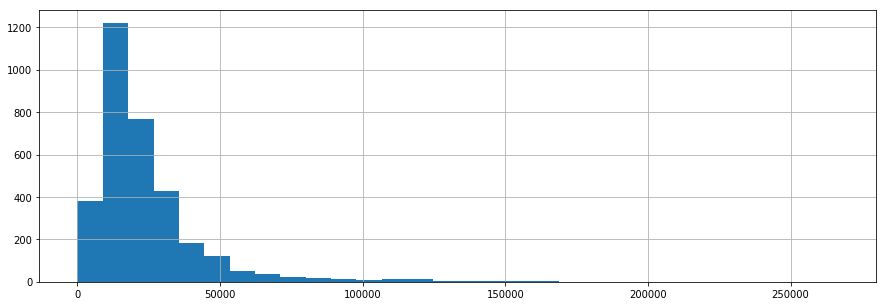

In [21]:
df.tax_assessed_value.hist(bins=30, figsize=(15,5))

In [51]:
# .T is transpose, makes the columns vertical instead of horizontal

df[describe_cols + output_cols].groupby('audantic_target').mean().round().T

audantic_target,0,1
square_footage,1595.0,1388.0
year_built,1950.0,1939.0
equity,66499.0,56084.0
estimated_value,305796.0,286886.0
tax_assessed_value,24003.0,25807.0
length_of_ownership,7.0,6.0
sale_amount,292122.0,211090.0
est_household_income_val,66804.0,48591.0
mosaic_hh_val,37.0,42.0
mosaic_zip4_val,30.0,34.0


In [53]:
df.groupby('document_type').agg({'audantic_target': ['sum','count','mean']})

audantic_target                 
                                                sum  count      mean
document_type                                                       
Deed in Lieu of Foreclosure                       0      5  0.000000
Dual Purpose Document                             1      9  0.111111
Grant Deed                                     1200  24315  0.049352
Loan 1 (Only) Is A Reverse Mortgage               0      1  0.000000
Trustees Deed                                     0   1724  0.000000
Warranty Deed                                  1539  48987  0.031416

# Analysis